# tables.ttools

Ttools is an IRAF library used to build and manipulate STSDAS tables.

<a id='notes'></a>

## Notes

**For questions or comments please see** [our github page](https://github.com/spacetelescope/stak).  **We encourage and appreciate user feedback.**

**Most of these notebooks rely on basic knowledge of the Astropy FITS I/O module.  If you are unfamiliar with this module please see the** [Astropy FITS I/O user documentation](http://docs.astropy.org/en/stable/io/fits/) **before using this documentation**.

Many of the table tools in this package are easily accesible with the [Astropy Table](http://docs.astropy.org/en/stable/table/) object.  Here we will show the ``Astropy`` ``Table`` equiavlent of the ttools tasks. Below we import the example table we will be using.  Please run this cell before running any of the sections below.


Contents:

* [imtab-tabim](#imtab-tabim)
* [partab](#partab)
* [tabpar](#tabpar)
* [taextract-tainsert](#taextract-tainsert)
* [tcalc](#tcalc)
* [tchcol](#tchcol)
* [tcopy-tdump](#tcopy-tdump)
* [tdiffer](#tdiffer)
* [texpand](#texpand)
* [thhistogram](#thistogram)
* [thselect](#thselect)
* [tiimage-titable-tximage-txtable](#tiimage-titable-tximage-txtable)
* [tinfo-tlcol-tprint](#tinfo-tlcol-tprint)
* [tintegrate](#tintegrate)
* [tjoin](#tjoin)
* [tmatch](#tmatch)
* [tmerge](#tmerge)
* [trebin](#trebin)
* [tselect-tproject-tquery](#tselect-tproject-tquery)
* [tsort](#tsort)
* [tstat](#tstat)

In [3]:
#Here we import the example table we will be using from a text file:
from astropy.table import Table

filename = "/eng/ssb/iraf_transition/test_data/table2.txt"
ex_table = Table.read(filename, format='ascii')
ex_table

Name,Animal,age,weight(lbs)
str7,str9,int64,float64
Fluffy,cat,5,6.5
Skippy,dog,7,10.1
Potato,guineapig,2,2.5
Squeaky,mouse,1,0.75
Jhope,snake,5,25.0


<br>

<br>

<a id='imtab-tabim'></a>

## imtab-tabim

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

imtab can be used to copy an image to a table column.  We can accomplish this by first flattening the array, then putting it into a table. For more details see the [Table construction documentation](http://docs.astropy.org/en/stable/table/construct_table.html). Tabim is used to copy a column back to a table, show below.

In [3]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.table import Table

In [4]:
# Create test array and flatten
image_array=np.random.rand(6,6)
image_array=image_array.flatten()

# Put into table, to make it a column we need the outside []
t = Table([image_array])
print(t)

# Now to re-extract the array we have to grab the data and unflatten it.
extract_array = t['col0'].data.reshape((6,6))
print(extract_array)

      col0      
----------------
  0.778737912301
  0.540657453378
  0.844846864945
  0.437430786445
   0.42531847321
  0.378941776732
  0.569759441559
  0.887288689867
  0.140683275852
   0.75117263098
             ...
     0.861420953
  0.574230666443
   0.42707825074
  0.987672488509
  0.610368735644
0.00483079453182
  0.837378466165
   0.44437740426
  0.381211045687
 0.0859310763191
 0.0704851730697
Length = 36 rows
[[ 0.77873791  0.54065745  0.84484686  0.43743079  0.42531847  0.37894178]
 [ 0.56975944  0.88728869  0.14068328  0.75117263  0.39693562  0.96491753]
 [ 0.00303176  0.2884746   0.44517577  0.89533482  0.84799734  0.72115084]
 [ 0.16727558  0.59748484  0.35737339  0.788007    0.8695291   0.73762861]
 [ 0.34344701  0.86142095  0.57423067  0.42707825  0.98767249  0.61036874]
 [ 0.00483079  0.83737847  0.4443774   0.38121105  0.08593108  0.07048517]]


<br>

<a id='partab'></a>

## partab

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Partab is used to transfer and IRAF parameter to a table element. Below we show the ``Astropy Table`` equivalent using indexing.  See the [Modifying Table](http://docs.astropy.org/en/stable/table/modify_table.html) documentation for more details.

In [7]:
# Astronomy Specific Imports
from astropy.table import Table

In [8]:
ex_table['weight(lbs)'][4]=1.5
ex_table

Name,Animal,age,weight(lbs)
str7,str9,int64,float64
Fluffy,cat,5,6.5
Skippy,dog,7,10.1
Potato,guineapig,2,2.5
Squeaky,mouse,1,0.75
Jhope,snake,5,1.5


<br>

<a id='tabpar'></a>

## tabpar

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

The tabpar task takes a header keyword and moves it to an IRAF parameter.  Extracting values from an astropy table is straightfoward with indexing. Keep in mind the indexing is zero based. When an FITS file is read into a table, the header information is saved in the meta data as an ``Ordered Dictionary``.  Below we show you how to pull values from the table data, and meta data.

In [9]:
# Astronomy Specific Imports
from astropy.table import Table

In [10]:
# Pulling values out of a table
column=ex_table['Name']
print(column)
entry=ex_table['Animal'][2]
print('\n')
print(entry)

  Name 
-------
 Fluffy
 Skippy
 Potato
Squeaky
  Jhope


guineapig


In [11]:
# Pulling values out of the meta data
fits_file = '/eng/ssb/iraf_transition/test_data/08b18470j_imp.fits'
fits_table = Table.read(fits_file, hdu=2)
print(fits_table.meta)
print(fits_table.meta['EXTNAME'])

OrderedDict([('EXTNAME', 'PHOTPLAM'), ('EXTVER', 1)])
PHOTPLAM


<br>

<a id='taextract-tainsert'></a>

## taextract-tainsert

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Taextract and tainsert are used to copy scalar columns to array entries, and vice versa.  We will show how to store an array in an ``Astropy Table`` from a ``list`` of scalars.

In [12]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.table import Table

In [13]:
scalar_list = [4,5,6,7,8,9]

# Change to array
in_arr = np.array(scalar_list)

# Store in table
t = Table([[in_arr]])
t.pprint()

# Now extract array back to scalar list, flatten will take out the extra dimension
out_arr = t['col0'][0]
out_list = out_arr.tolist()
print(out_list)

col0 [6]
--------
  4 .. 9
[4, 5, 6, 7, 8, 9]


<br>

<a id='tcalc'></a>

## tcalc

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tcalc is used to perform arithmetic operations on table columns. This can be done automaticaly with any compatible data types. A new ``Column`` object will be returned.

In [14]:
# Astronomy Specific Imports
from astropy.table import Table

In [15]:
out = ex_table['age'] + ex_table['weight(lbs)']
out

11.5
17.1
4.5
1.75
6.5


<br>

<a id='tchcol'></a>

## tchcol

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

tchcol is used to change the column name, format or units.  This can be done easily with ``Astropy Tables``, and the [Astropy Units](http://docs.astropy.org/en/stable/units/) module.

In [16]:
# Astronomy Specific Imports
from astropy.table import Table
import astropy.units as u

In [17]:
# Set filename, read in file
filename = "/eng/ssb/iraf_transition/test_data/table2.txt"
ed_table = Table.read(filename, format='ascii')

# To get table info
print(ed_table.info)

# To add/update units
ed_table['weight(lbs)'].unit = u.imperial.lb
print(ed_table.info)

# To change column name
ed_table['weight(lbs)'].name='weight'
print(ed_table.info)

# To change dtype
ed_table['age'].dtype = 'float64'
print(ed_table.info)

<Table length=5>
    name     dtype 
----------- -------
       Name    str7
     Animal    str9
        age   int64
weight(lbs) float64

<Table length=5>
    name     dtype  unit
----------- ------- ----
       Name    str7     
     Animal    str9     
        age   int64     
weight(lbs) float64   lb

<Table length=5>
 name   dtype  unit
------ ------- ----
  Name    str7     
Animal    str9     
   age   int64     
weight float64   lb

<Table length=5>
 name   dtype  unit
------ ------- ----
  Name    str7     
Animal    str9     
   age float64     
weight float64   lb



<br>

<a id='tcopy-tdump'></a>

## tcopy-tdump

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tcopy is used to copy tables, and can save a table to ASCII or FITS format.  Similarly, tdump is used to save a table to an ASCII file. We will show both save methods and a copy below.  For more details see the [unified read/write](http://docs.astropy.org/en/stable/io/unified.html) documentation. For more details on ``Table`` object copying see the [copy versus reference](http://docs.astropy.org/en/stable/table/construct_table.html#copy-versus-reference) doc section.

In [1]:
# Astronomy Specific Imports
from astropy.table import Table

In [7]:
# Make a copy of our example table
tab_copy = ex_table.copy()

# Save as ASCII
outfile = 'copy_table.txt'
tab_copy.write(outfile, format='ascii', overwrite=True)

# Same method call to write to FITS
outfits = 'copy_table.fits'
tab_copy.write(outfits, overwrite=True)

<br>

<a id='tdiffer'></a>

## tdiffer

Will be available soon in Astropy

![](static/150pxblueconstuc.png "Work in progress")

<br>

<a id='texpand'></a>

## texpand

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Texpand is used to edit and change tables according to a set of user provided rules.  This can be done by building a customized loop over the input table.  Below we show a simple example, but this can be easily modified to fit the users needs.

In [21]:
# Astronomy Specific Imports
from astropy.table import Table

In [22]:
# change a animal type of 'cat' or 'snake' to guineapig
new_table = ex_table.copy()
for row in new_table:
    if row[1] in ['cat','snake']:
        row[1]='guineapig'
print(new_table)

  Name    Animal  age weight(lbs)
------- --------- --- -----------
 Fluffy guineapig   5         6.5
 Skippy       dog   7        10.1
 Potato guineapig   2         2.5
Squeaky     mouse   1        0.75
  Jhope guineapig   5         1.5


<br>

<a id='thistogram'></a>

## thistogram

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Thistogram makes a histogram from a data column in a table.  We can easily accomplish this using the ``Astropy Tables`` and [Matplotlib.pyplot.hist](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html) tasks. For this example we will use the default binning. There is also an [Astropy histogram](http://docs.astropy.org/en/stable/api/astropy.stats.histogram.html) and a [Numpy histogram](https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html) available for generating the histogram data.

In [23]:
# Astronomy Specific Imports
from astropy.table import Table

# Plotting Imports/Setup
import matplotlib.pyplot as plt
%matplotlib inline

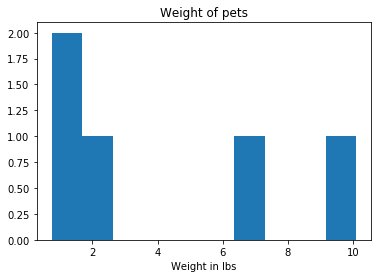

In [24]:
# Using the weight column of our example table
n, bins, patches = plt.hist(ex_table['weight(lbs)'].data)

plt.xlabel('Weight in lbs')
plt.title('Weight of pets')
plt.show()

<br>

<a id='thselect'></a>

## thselect

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Thselect, which selects table keywords satisfying an expression, can be replicated using [Python boolean expressions](https://docs.python.org/3.6/library/stdtypes.html) and the built in row iterator in ``Astropy Tables``.

In [25]:
# Astronomy Specific Imports
from astropy.table import Table

In [26]:
# Iterate over the rows, check for name and age, print animal if found
for row in ex_table:
    if row['Name'] == 'Fluffy' and row['age'] == 5:
        print(row['Animal'])

cat


<br>

<a id='tiimage-titable-tximage-txtable'></a>

## tiimage-titable-tximage-txtable

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tiimage, titable, tximage, and txtable are all 3-D table functions.  ``Astropy`` ``Table`` objects can store any dimension ``numpy`` arrays in each element, as long as there is consistancy in the column.  Below we show a short example of storing a 3-D array in an ``Astropy`` Table. The rest of the functionality is the same as the general table funcitonality.

In [27]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.table import Table

In [28]:
# Storing a 2-D arrays in one column of a table
arr1 = np.random.rand(60,90)
arr2 = np.random.rand(60,90)
# To retain the 2-D array as an element in the table, make sure you use two sets of square brackets
three_table = Table([[arr1,arr2]],names=('Arrays',))
three_table.pprint()

# To pull out one array element, index column name then row numbers
three_table['Arrays'][1]

         Arrays [60,90]         
--------------------------------
0.892760413585 .. 0.283382986211
0.637760881193 .. 0.363642899902


array([[ 0.63776088,  0.91520904,  0.02255264, ...,  0.68817791,
         0.53479407,  0.30667641],
       [ 0.97267867,  0.55856732,  0.86993039, ...,  0.91039544,
         0.63862112,  0.58102198],
       [ 0.51181066,  0.85164649,  0.05432316, ...,  0.36084783,
         0.58934112,  0.96374561],
       ..., 
       [ 0.83594372,  0.79412333,  0.78455287, ...,  0.88604032,
         0.16606121,  0.1500973 ],
       [ 0.81858617,  0.16964881,  0.00841479, ...,  0.66355838,
         0.95266558,  0.79603504],
       [ 0.81294063,  0.79609841,  0.58490711, ...,  0.3697692 ,
         0.65451337,  0.3636429 ]])

<br>

<a id='tinfo=tlcol-tprint'></a>

## tinfo-tlcol-tprint

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tinfo, tlcol and tprint were all used to display information about the table.  Below we show the ``Astropy Table`` equivalents.

In [30]:
# Astronomy Specific Imports
from astropy.table import Table

In [31]:
# For tinfo and tlcol
print(ex_table.info)

<Table length=5>
    name     dtype 
----------- -------
       Name    str7
     Animal    str9
        age   int64
weight(lbs) float64



In [32]:
# For tprint
ex_table.pprint()

  Name    Animal  age weight(lbs)
------- --------- --- -----------
 Fluffy       cat   5         6.5
 Skippy       dog   7        10.1
 Potato guineapig   2         2.5
Squeaky     mouse   1        0.75
  Jhope     snake   5         1.5


<br>

<a id='tintegrate'></a>

## tintegrate

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tintegrate is used to numerically integrate one column with respect to another.  This can be done using the [numpy.traz function](https://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html). As we have shown how to extract an array from a Table in various other tasks in this notebook we will only cover the integration step here.

In [34]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.table import Table

In [35]:
# Setup array, here you would pull from a table
x = [1, 2, 3, 4, 6]
y = [10.5, 12.3, 22.2, 13.3, 7.7]

result = np.trapz(y,x)
print(result)

67.4


<br>

<a id='tjoin'></a>

## tjoin

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tjoin is used to perform a relational join of two tables. You can do all join types (inner, left, right, and outer) in the Astropy ``Tables`` package, see [join docs here](http://docs.astropy.org/en/stable/table/operations.html#join) for more details.  We take the examples shown here from the Astropy docs.

In [36]:
# Astronomy Specific Imports
from astropy.table import Table, join

In [37]:
# Setup tables
optical = Table.read("""name    obs_date    mag_b  mag_v
                        M31     2012-01-02  17.0   16.0
                        M82     2012-10-29  16.2   15.2
                        M101    2012-10-31  15.1   15.5""", format='ascii')
xray = Table.read("""   name    obs_date    logLx
                        NGC3516 2011-11-11  42.1
                        M31     1999-01-05  43.1
                        M82     2012-10-29  45.0""", format='ascii')

In [38]:
# Default inner join, default key column to set of columns that are common to both tables.
opt_xray = join(optical, xray)
print(opt_xray)

name  obs_date  mag_b mag_v logLx
---- ---------- ----- ----- -----
 M82 2012-10-29  16.2  15.2  45.0


In [39]:
# Left join
print(join(optical, xray, join_type='left'))

name  obs_date  mag_b mag_v logLx
---- ---------- ----- ----- -----
M101 2012-10-31  15.1  15.5    --
 M31 2012-01-02  17.0  16.0    --
 M82 2012-10-29  16.2  15.2  45.0


In [40]:
# Right join, with only name field as key
print(join(optical, xray, join_type='right', keys='name'))

  name  obs_date_1 mag_b mag_v obs_date_2 logLx
------- ---------- ----- ----- ---------- -----
    M31 2012-01-02  17.0  16.0 1999-01-05  43.1
    M82 2012-10-29  16.2  15.2 2012-10-29  45.0
NGC3516         --    --    -- 2011-11-11  42.1


In [41]:
# Outer join
print(join(optical, xray, join_type='outer'))

  name   obs_date  mag_b mag_v logLx
------- ---------- ----- ----- -----
   M101 2012-10-31  15.1  15.5    --
    M31 1999-01-05    --    --  43.1
    M31 2012-01-02  17.0  16.0    --
    M82 2012-10-29  16.2  15.2  45.0
NGC3516 2011-11-11    --    --  42.1


<br>

<a id='tmatch'></a>

## tmatch

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tmatch is used to find the closest match between rows in two tables.  This functionality is contained in the [coordinates package](http://docs.astropy.org/en/stable/coordinates/matchsep.html) of Astropy. This example is taken from the [Coordinates notebook](http://www.astropy.org/astropy-tutorials/Coordinates.html), see the notebook for more details.

In [42]:
# Astronomy Specific Imports
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u

In [43]:
# Open table files
file1 = '/eng/ssb/iraf_transition/test_data/HCG7_SDSS_photo.dat'
file2 = '/eng/ssb/iraf_transition/test_data/HCG7_2MASS.tbl'
sdss = Table.read(file1, format='ascii')
twomass = Table.read(file2, format='ascii')

# Match between catalogs
coo_sdss = SkyCoord(sdss['ra']*u.deg, sdss['dec']*u.deg)
coo_twomass = SkyCoord(twomass['ra'], twomass['dec'])
idx_sdss, d2d_sdss, d3d_sdss = coo_twomass.match_to_catalog_sky(coo_sdss)

<br>

<a id='tmerge'></a>

## tmerge

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tmerge is used to combine columns or rows of multiple tables. There are two [Astropy Table tasks](http://docs.astropy.org/en/stable/table/operations.html) for this, ``vstack`` and ``hstack``. We take these examples from the Astropy table docs.

In [44]:
# Astronomy Specific Imports
from astropy.table import Table, vstack, hstack

In [45]:
# Setup tables
obs1 = Table.read("""name    obs_date    mag_b  logLx
                     M31     2012-01-02  17.0   42.5
                     M82     2012-10-29  16.2   43.5
                     M101    2012-10-31  15.1   44.5""", format='ascii')

obs2 = Table.read("""name    obs_date    logLx
                     NGC3516 2011-11-11  42.1
                     M31     1999-01-05  43.1
                     M82     2012-10-30  45.0""", format='ascii')

# Vertical stack
print(vstack([obs1, obs2]))

  name   obs_date  mag_b logLx
------- ---------- ----- -----
    M31 2012-01-02  17.0  42.5
    M82 2012-10-29  16.2  43.5
   M101 2012-10-31  15.1  44.5
NGC3516 2011-11-11    --  42.1
    M31 1999-01-05    --  43.1
    M82 2012-10-30    --  45.0


In [46]:
# Setup tables
t1 = Table.read("""a   b    c
                   1   foo  1.4
                   2   bar  2.1
                   3   baz  2.8""", format='ascii')
t2 = Table.read("""d     e
                   ham   eggs
                   spam  toast""", format='ascii')

# Horizontal stack
print(hstack([t1, t2]))

 a   b   c   d     e  
--- --- --- ---- -----
  1 foo 1.4  ham  eggs
  2 bar 2.1 spam toast
  3 baz 2.8   --    --


<br>

<a id='trebin'></a>

## trebin

Trebin allows the user to rebin columns in a table using linear or spline interpolation. See the [binning doc section](http://docs.astropy.org/en/stable/table/operations.html#binning) for a subset of this functionality.

![](static/150pxblueconstuc.png "Work in progress")

<br>

<a id='tselect-tproject-tquery'></a>

## tselect-tproject-tquery

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tselect is used to create a new table from selected rows, tproject from selected columns, and tquery from a combination of selected rows and columns.  We show two examples of how to generate a new table from selected columns and selected rows.  You can combine these two pieces of code in either order to get a tquery like result.  There is an alternate way to do selections if you have already organized your table into groups by using the [filter method](http://docs.astropy.org/en/stable/table/operations.html#filtering), but the user will still need to write a custom filtering function to provide to ``filter``.

In [47]:
# Astronomy Specific Imports
from astropy.table import Table

In [48]:
# For adding rows we give the new table an initial column setup, 
# copied from the original table through the dtype keyword
table1 = Table(dtype=ex_table.dtype)
for row in ex_table:
    if row['Name'] == 'Fluffy' or row['age'] == 5:
        table1.add_row(row)
table1.pprint()

 Name  Animal age weight(lbs)
------ ------ --- -----------
Fluffy    cat   5         6.5
 Jhope  snake   5         1.5


In [49]:
# For adding columns we start with an empty new table
table2 = Table()
for col in ex_table.itercols():
    if col.name in ['Name','Animal']:
        table2[col.name] = col
table2.pprint()

  Name    Animal 
------- ---------
 Fluffy       cat
 Skippy       dog
 Potato guineapig
Squeaky     mouse
  Jhope     snake


<br>

<a id='tsort'></a>

## tsort

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

Tsort, as you would guess, sorts a table.  ``Astropy`` ``Table`` objects have a built in [sort method](http://docs.astropy.org/en/stable/table/modify_table.html). You can even sort by more then one column. Sorting is inplace so in this example we make a copy of the table first.

In [50]:
# Standard Imports
import numpy as np

# Astronomy Specific imports
from astropy.table import Table

In [51]:
# sorting
sorted_table = ex_table.copy()
sorted_table.sort('Name')
sorted_table.pprint()

  Name    Animal  age weight(lbs)
------- --------- --- -----------
 Fluffy       cat   5         6.5
  Jhope     snake   5         1.5
 Potato guineapig   2         2.5
 Skippy       dog   7        10.1
Squeaky     mouse   1        0.75


<br>

<a id='tstat'></a>

## tstat

**Please review the** [Notes](#notes) **section above before running any examples in this notebook**

tstat gives you the mean, standard deviation, minimum and maximum of a column.  This can be done by feeding the desired columns into standard ``Numpy`` and built-in Python functions.

In [52]:
# Standard Imports
import numpy as np

# Astronomy Specific Imports
from astropy.table import Table

In [53]:
# Mean
mean = np.mean(ex_table['weight(lbs)'])
print(mean)

# Standard Deviation
std = np.std(ex_table['weight(lbs)'])
print(std)
             
# Min and Max
mini = min(ex_table['age'])
maxi = max(ex_table['age'])
print(mini)
print(maxi)

4.27
3.52584741587
1
7


<br>

<br>

## Not Replacing

* gtedit - Graphically edit a table. Deprecated.
* gtpar - Pset to specify graph parameters for gtedit task. Deprecated.
* keytab - Copy n image or table header keyword to a table element. See [Astropy Tables](http://docs.astropy.org/en/stable/table/index.html) documentation.
* keypar - Copy an image or table header keyword to an IRAF parameter. See [Astropy FITS](http://docs.astropy.org/en/stable/io/fits/) documentation.
* keyselect - Copy selected image header keywords to sdas table. See **images.imtuil**
* parkey - Put an IRAF parameter into an image or table header keyword. See [Astropy FITS](http://docs.astropy.org/en/stable/io/fits/) documentation.
* tabkey - Copy a table element to an image or table header keyword. See the above notebook and [Astropy FITS](http://docs.astropy.org/en/stable/io/fits/) documentation.
* tcheck - Check STSDAS table element values. See [Astropy Tables](http://docs.astropy.org/en/stable/table/index.html) documentation.
* tchsize - Change allocated sizes of various sections of a table. Deprecated.
* tcreate - Create a FITS table from an ASCII descriptor table. see [tcopy-tdump](#tcopy-tdump) and [Unified I/O](http://docs.astropy.org/en/stable/io/unified.html#fits) documentation.
* tdelete - Delete tables. Deprecated.
* tedit - Edit a table. See [Astropy Tables](http://docs.astropy.org/en/stable/table/index.html) documentation or [partab](#partab).
* thedit - Edit or print table header keywords. See [tabpar](#tabpar).
* tlinear - Use linear regression to fit one or two table columns. See **images.imfit.fit1d**
* tproduct - Form the Cartesian product of two tables. See [tjoin](#tjoin)
* tread - Browse through a table. See [Astropy Tables](http://docs.astropy.org/en/stable/table/index.html) documentation.
* tscopy - Copy row/column subsets of tables using selectors. See [tselect-tproject-tquery](#tselect-tproject-tquery).
* ttranspose - Transpose or flip a table. Deprecated.
* tupar - Edit table header keywords. Interactive GUI. Deprecated
* tupar - Edit table header keywords. Interactive GUI. See [tchcol](#tchcol)